# Benchmark the Oakley-O'Hagan test function

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv

In [2]:
problem = otb.OakleyOHaganSensitivity()

In [3]:
print(problem)

name = Oakley-O'Hagan
distribution = ComposedDistribution(Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), IndependentCopula(dimension = 15))
function = class=PythonEvaluation name=OpenTURNSPythonFunction
firstOrderIndices = [0,0,0,0,0,0.02,0.02,0.03,0.05,0.01,0.1,0.14,0.1,0.11,0.12]#15
totalOrderIndices = [0.06,0.06,0.04,0.05,0.02,0.04,0.06,0.08,0.1,0.04,0.15,0.15,0.14,0.14,0.16]#15


In [4]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [5]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=15 values=[0,0,0,0,0,0.02,0.02,0.03,0.05,0.01,0.1,0.14,0.1,0.11,0.12]

In [6]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=15 values=[0.06,0.06,0.04,0.05,0.02,0.04,0.06,0.08,0.1,0.04,0.15,0.15,0.14,0.14,0.16]

## Plot the function

In [7]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 200
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

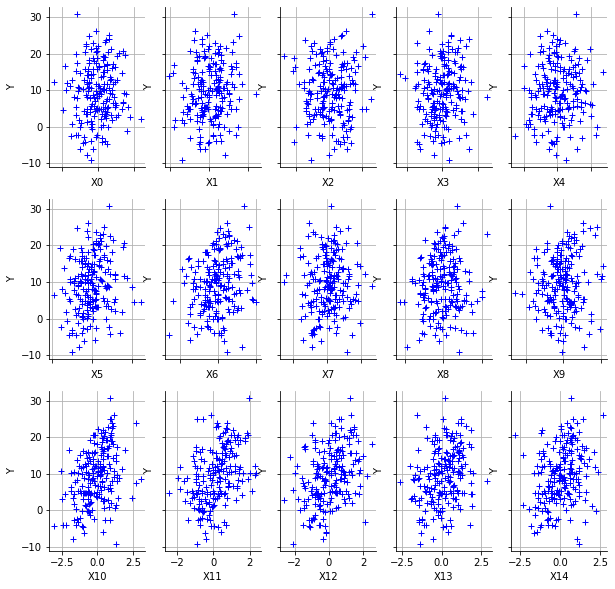

In [8]:
dimension = distribution.getDimension()
nbcolumns = 5
nbrows = int(dimension / nbcolumns)
grid = ot.GridLayout(nbrows, nbcolumns)
inputDescription = distribution.getDescription()
outputDescription = model.getOutputDescription()[0]
index = 0
for i in range(nbrows):
    for j in range(nbcolumns):
        graph = ot.Graph(
            "n=%d" % (size), inputDescription[index], outputDescription, True, ""
        )
        sample = ot.Sample(size, 2)
        sample[:, 0] = inputDesign[:, index]
        sample[:, 1] = outputDesign[:, 0]
        cloud = ot.Cloud(sample)
        graph.add(cloud)
        grid.setGraph(i, j, graph)
        index += 1
view = otv.View(grid, figure_kw={"figsize": (10.0, 10.0)})

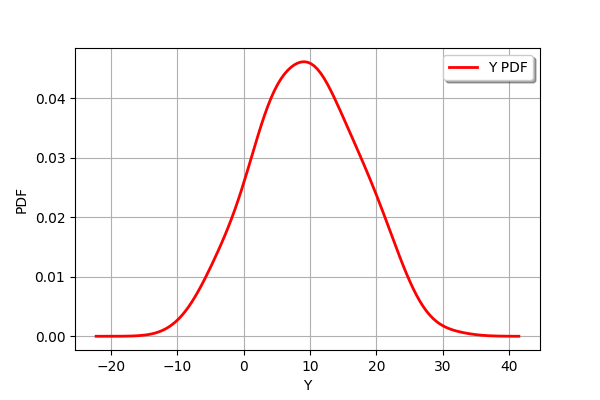

In [9]:
output_distribution = ot.KernelSmoothing().build(outputDesign)
output_distribution.drawPDF()

## Perform sensitivity analysis

In [10]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 1000
inputDesign = ot.SobolIndicesExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [11]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [12]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order = ", exact_total_order)

Sample size :  1000
Computed first order =  [0.00686154,0.0173649,0.0121877,-0.0153947,-0.0223964,0.0038293,0.0373239,0.014391,0.0568532,0.0057647,0.0867005,0.162502,0.0882588,0.0706715,0.108779]#15
Exact first order =  [0,0,0,0,0,0.02,0.02,0.03,0.05,0.01,0.1,0.14,0.1,0.11,0.12]#15
Computed total order =  [0.0565808,0.0625981,0.0461935,0.0758801,0.0356766,0.028928,0.058367,0.101891,0.087846,0.0501691,0.128598,0.146953,0.125396,0.149566,0.16276]#15
Exact total order =  [0.06,0.06,0.04,0.05,0.02,0.04,0.06,0.08,0.1,0.04,0.15,0.15,0.14,0.14,0.16]#15


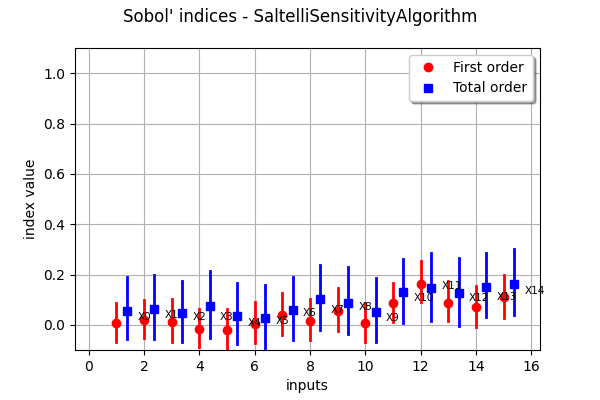

In [13]:
sensitivityAnalysis.draw()